## Models of Stock Return

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from path import Path
%matplotlib inline

In [18]:
ms = pd.read_csv(Path('../Practicing_Python_daily/data/microsoft.csv'),parse_dates=['Date'], index_col=['Date'])
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


## Distribution of Log return

In [21]:
# let play around with ms data by calculating the log daily return
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])
ms

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994
...,...,...,...,...,...,...,...
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,0.024182
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-0.007925
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,-0.026663


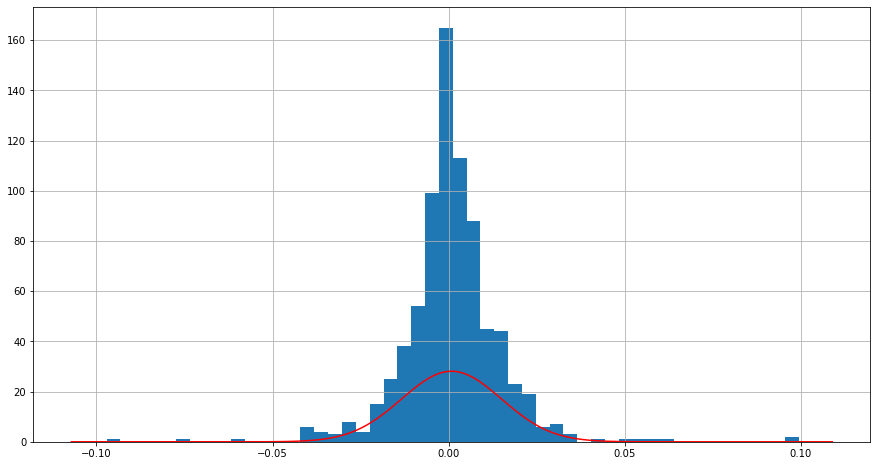

In [22]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

## Calculate the probability of the stock price will drop over a certain percentage in a day

In [23]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.00017118482608677817


In [24]:
# probability that the stock price of microsoft will drop over 10% in a day
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  6.056775634858521e-13


**Expected Output: ** The Probability is  6.05677563486e-13

## Calculate the probability of the stock price will drop over a certain percentage in a year

In [25]:
# drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.002912363313330548


In [27]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = norm.cdf(-0.2, mu220, sigma220)
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  0.03535237727490905


**Expected Output: ** The probability of dropping over 20% in 220 days is  0.0353523772749

## Calculate Value at risk (VaR)

In [28]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.022523362407065


In [29]:
# Quantiles 
# 5% quantiles
print('5% quantiles ', norm.ppf(0.05, mu, sigma))
# 95% quantiles
print('95% quantiles ', norm.ppf(0.95, mu, sigma))

5% quantiles  -0.022523362407065
95% quantiles  0.024163825379311034


In [30]:
# Calculate the 25% and 75% Quantiles of the return
# 25% quantiles
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantiles ', q25)
# 75% quantiles
q75 = norm.ppf(0.75, mu, sigma) 
print('75% quantiles ', q75)

25% quantiles  -0.008752057838414963
75% quantiles  0.010392520810661006


**Expected Output: ** 25% quantile  -0.00875205783841
75% quantile  0.0103925208107